In [2]:
import torch
import torch.nn as nn

device = torch.device("mps")
torch.manual_seed(777)
if device == 'mps':
    torch.mps.manual_seed_all(777)


In [8]:
# 파이토치로 단층 퍼셉트론 구현하기
X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)

linear = nn.Linear(2, 1, bias=True)
sigmoid = nn.Sigmoid()
model = nn.Sequential(linear, sigmoid).to(device)



In [6]:
# 비용 함수와 옵티마이저 정의
criterion = torch.nn.BCELoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=1)

for step in range(10001): 
    optimizer.zero_grad()
    hypothesis = model(X)

    # 비용 함수
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()

    if step % 100 == 0: # 100번째 에포크마다 비용 출력
        print(step, cost.item())


0 0.7273974418640137
100 0.6931475400924683
200 0.6931471228599548
300 0.6931471228599548
400 0.6931471824645996
500 0.6931471824645996
600 0.6931471824645996
700 0.6931471824645996
800 0.6931471824645996
900 0.6931471824645996
1000 0.6931471824645996
1100 0.6931471824645996
1200 0.6931471824645996
1300 0.6931471824645996
1400 0.6931471824645996
1500 0.6931471824645996
1600 0.6931471824645996
1700 0.6931471824645996
1800 0.6931471824645996
1900 0.6931471824645996
2000 0.6931471824645996
2100 0.6931471824645996
2200 0.6931471824645996
2300 0.6931471824645996
2400 0.6931471824645996
2500 0.6931471824645996
2600 0.6931471824645996
2700 0.6931471824645996
2800 0.6931471824645996
2900 0.6931471824645996
3000 0.6931471824645996
3100 0.6931471824645996
3200 0.6931471824645996
3300 0.6931471824645996
3400 0.6931471824645996
3500 0.6931471824645996
3600 0.6931471824645996
3700 0.6931471824645996
3800 0.6931471824645996
3900 0.6931471824645996
4000 0.6931471824645996
4100 0.6931471824645996
4200

In [7]:
with torch.no_grad():
    hypothesis = model(X)
    predicted = (hypothesis > 0.5).float()
    accuracy = (predicted == Y).float().mean()
    print('모델의 출력값(Hypothesis): ', hypothesis.detach().cpu().numpy())
    print('모델의 예측값(Predicted): ', predicted.detach().cpu().numpy())
    print('실제값(Y): ', Y.cpu().numpy())
    print('정확도(Accuracy): ', accuracy.item())



모델의 출력값(Hypothesis):  [[0.5]
 [0.5]
 [0.5]
 [0.5]]
모델의 예측값(Predicted):  [[0.]
 [0.]
 [0.]
 [0.]]
실제값(Y):  [[0.]
 [1.]
 [1.]
 [0.]]
정확도(Accuracy):  0.5


In [9]:
# 파이토치로 다층 퍼셉트론 구현하기
import torch
import torch.nn as nn

device = torch.device("mps")
torch.manual_seed(777)
if device == 'mps':
    torch.mps.manual_seed_all(777)


In [11]:
# XOR 문제 풀기
X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)

model = nn.Sequential(
          nn.Linear(2, 10, bias=True), # input_layer = 2, hidden_layer1 = 10
          nn.Sigmoid(),
          nn.Linear(10, 10, bias=True), # hidden_layer1 = 10, hidden_layer2 = 10
          nn.Sigmoid(),
          nn.Linear(10, 10, bias=True), # hidden_layer2 = 10, hidden_layer3 = 10
          nn.Sigmoid(),
          nn.Linear(10, 1, bias=True), # hidden_layer3 = 10, output_layer = 1
          nn.Sigmoid()
          ).to(device)

criterion = torch.nn.BCELoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=1)  # modified learning rate from 0.1 to 1

for epoch in range(10001):
    optimizer.zero_grad()
    # forward 연산
    hypothesis = model(X)

    # 비용 함수
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()

    # 100의 배수에 해당되는 에포크마다 비용을 출력
    if epoch % 100 == 0:
        print(epoch, cost.item())



0 0.7408947944641113
100 0.6931389570236206
200 0.6931374073028564
300 0.6931357383728027
400 0.6931342482566833
500 0.6931324601173401
600 0.693130612373352
700 0.6931287050247192
800 0.6931267380714417
900 0.6931245923042297
1000 0.693122386932373
1100 0.693120002746582
1200 0.6931174993515015
1300 0.6931146383285522
1400 0.6931118369102478
1500 0.6931086182594299
1600 0.6931051015853882
1700 0.6931012272834778
1800 0.6930969953536987
1900 0.6930922865867615
2000 0.6930870413780212
2100 0.6930812001228333
2200 0.6930745840072632
2300 0.6930670738220215
2400 0.6930584907531738
2500 0.6930485963821411
2600 0.6930371522903442
2700 0.6930238008499146
2800 0.6930078268051147
2900 0.6929886937141418
3000 0.6929655075073242
3100 0.6929367780685425
3200 0.6929006576538086
3300 0.6928542852401733
3400 0.6927931904792786
3500 0.6927101612091064
3600 0.6925928592681885
3700 0.6924186944961548
3800 0.6921423673629761
3900 0.6916618347167969
4000 0.6907040476799011
4100 0.6883158087730408
4200 0.

In [12]:
with torch.no_grad():
    hypothesis = model(X)
    predicted = (hypothesis > 0.5).float()
    accuracy = (predicted == Y).float().mean()
    print('모델의 출력값(Hypothesis): ', hypothesis.detach().cpu().numpy())
    print('모델의 예측값(Predicted): ', predicted.detach().cpu().numpy())
    print('실제값(Y): ', Y.cpu().numpy())
    print('정확도(Accuracy): ', accuracy.item())


모델의 출력값(Hypothesis):  [[6.8903209e-05]
 [9.9988174e-01]
 [9.9989259e-01]
 [1.5691217e-04]]
모델의 예측값(Predicted):  [[0.]
 [1.]
 [1.]
 [0.]]
실제값(Y):  [[0.]
 [1.]
 [1.]
 [0.]]
정확도(Accuracy):  1.0


# 역전파(Backpropagation)
- W = W -a(del_E/del_W)

# 다층 퍼셉트론으로 손글씨 분류하기

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt # 시각화를 위한 맷플롯립
from sklearn.datasets import load_digits
digits = load_digits() # 1,979개의 이미지 데이터 로드
print(digits.images[0])



[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


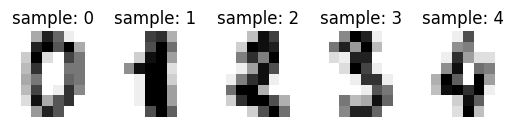

In [15]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:5]): # 5개의 샘플만 출력
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('sample: %i' % label)


In [22]:
import torch
import torch.nn as nn
from torch import optim

# 모델 정의: 순차적인 레이어 구조
model = nn.Sequential(
    nn.Linear(64, 32), # 입력층: 64, 첫 번째 은닉층: 32
    nn.ReLU(),         # 활성화 함수: ReLU
    nn.Linear(32, 16), # 첫 번째 은닉층: 32, 두 번째 은닉층: 16
    nn.ReLU(),         # 활성화 함수: ReLU
    nn.Linear(16, 10)  # 두 번째 은닉층: 16, 출력층: 10 (클래스의 개수)
)

# 입력 데이터 X와 레이블 Y를 텐서로 변환
X = torch.tensor(X, dtype=torch.float32)
Y = torch.tensor(Y, dtype=torch.int64)

loss_fn = nn.CrossEntropyLoss() # 이 비용 함수는 소프트맥스 함수를 포함하고 있음.
optimizer = optim.Adam(model.parameters())
losses = []


/var/folders/08/7nssmq351bs05px0mvs17chr0000gn/T/ipykernel_87933/3402289056.py:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X, dtype=torch.float32)
/var/folders/08/7nssmq351bs05px0mvs17chr0000gn/T/ipykernel_87933/3402289056.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Y = torch.tensor(Y, dtype=torch.int64)


In [23]:
# 총 100번의 에포크 동안 모델 학습
for epoch in range(100):
    optimizer.zero_grad()      # 옵티마이저의 기울기 초기화
    y_pred = model(X)          # 순전파 연산으로 예측값 계산
    loss = loss_fn(y_pred, Y)  # 손실 함수로 비용 계산
    loss.backward()            # 역전파 연산으로 기울기 계산
    optimizer.step()           # 옵티마이저를 통해 파라미터 업데이트

    # 10번째 에포크마다 현재 에포크와 손실 값 출력
    if epoch % 10 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
                epoch, 100, loss.item()
            ))

    # 손실 값을 리스트에 추가하여 추적
    losses.append(loss.item())


RuntimeError: linear(): input and weight.T shapes cannot be multiplied (4x2 and 64x32)

# 다층 퍼셉트론으로 손글씨 분류하기

In [25]:
import numpy as np
import matplotlib.pyplot as plt
# % matplotlib inline
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)


In [29]:
mnist.target = mnist.target.astype(np.int8)
X = mnist.data / 255  # 0-255값을 [0,1] 구간으로 정규화
y = mnist.target
X[0]